# Chapter 2

#### Datasets can be downloaded here: https://github.com/wesm/pydata-book/tree/1st-edition


## USA.gov Dataset

In [1]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


path = 'example.txt'
open(path).readline()




Saving example.txt to example.txt
User uploaded file "example.txt" with length 1598282 bytes


'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [2]:
import json
path = 'example.txt'
records = [json.loads(line) for line in open(path)]

records[0]
print(records[0]['tz'])
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

time_zones[:10]

America/New_York


['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [3]:
#Get counts of each time zone - Standard Python

def get_counts(sequence):
  counts = {}
  for x in sequence:
    if x in counts:
      counts[x] += 1
    else:
      counts[x] = 1
  return counts

counts = get_counts(time_zones)
counts['America/New_York'] #Get count of timezones that are equal to America/New Yowk


#Get top 10 time zones
def top_counts(count_dict, n=10):
  value_key_pairs = [(count,tz) for tz, count in counts.items()]
  value_key_pairs.sort()
  return value_key_pairs[-10:]

top_counts(counts)

#Another way to count the top 10
from collections import Counter

counts = Counter(time_zones)
counts.most_common(10)


[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [7]:
#Now counting the top 10 with Pandas

from pandas import DataFrame, Series
import pandas as pd

frame = DataFrame(records)

#Preview of the data
#frame

#Get the value counts:
tz_counts = frame['tz'].value_counts()

#tz_counts[:10]
#frame['tz'][:10]

tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

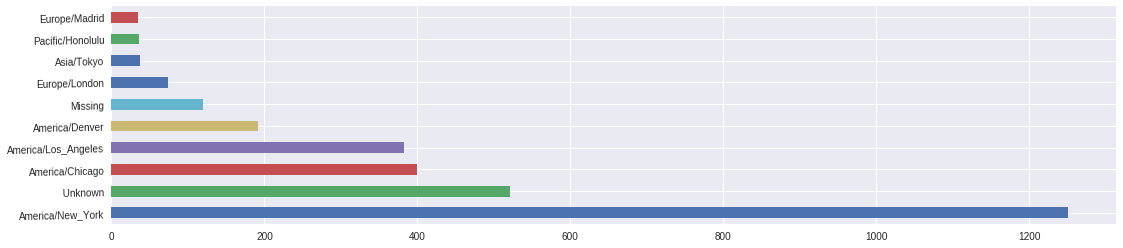

In [21]:
#Cleanin missing values in the frame

clean_tz = frame['tz'].fillna("Missing")
clean_tz[clean_tz == ''] = ' Unknown'
tz_counts= clean_tz.value_counts()
tz_counts[:10]


#Plot bar chart with data

tz_counts[:10].plot(kind='barh', rot='1', figsize=(18,4))


In [25]:
#Retrieving the browser from the dataset

results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

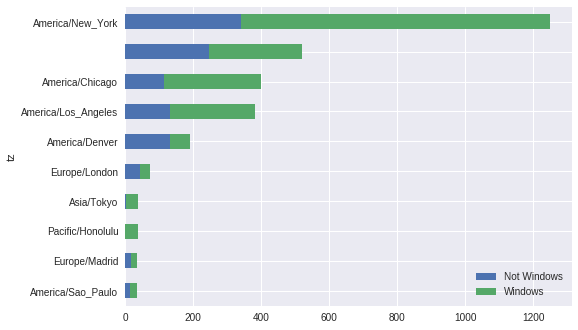

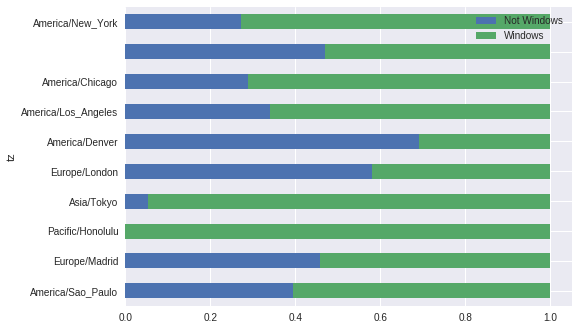

In [40]:
#If we want to divide the users into Windows and Not Windows users
import numpy as np
cframe = frame[frame.a.notnull()]
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

operating_system[:5]

#And then group the operating system with the time zones
by_tz_os = cframe.groupby(['tz', operating_system])


#Display the result (descending order)
agg_count = by_tz_os.size().unstack().fillna(0)
agg_count[:10]


# #Ascending order 
indexer = agg_count.sum(1).argsort()
indexer[:10]

#Get the slice of the top 10
count_subset = agg_count.take(indexer)[-10:]
count_subset

#Plotting the data
count_subset.plot(kind='barh', stacked=True)

#It might be hard to see the % of windows users in small groups
#so lets normalize it
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)


## Movie Lens Dataset

In [46]:
import pandas as pd
from google.colab import files

usersData = files.upload()
ratingsData = files.upload()
moviesData = files.upload()

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None, names=unames) 

rnames = ['user_id', 'movie_id','rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None, names=rnames) 

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None, names=mnames) 



Saving users.dat to users (3).dat


Saving ratings.dat to ratings (1).dat


Saving movies.dat to movies.dat


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as

In [71]:
#users[:5]
#ratings[:5]
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [70]:
#It's hard to analyse data split in 3 different tables so lets merge them
data = pd.merge(pd.merge(ratings, users), movies)

data.loc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                9.78301e+08
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [57]:
#With aggregated tables it is easy to get information about, lets say, movie ratings by gender
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",NaN,2.000000
'Night Mother (1986),3.000000,5.000000
'Til There Was You (1997),2.333333,NaN
"'burbs, The (1989)",3.250000,3.111111
...And Justice for All (1979),4.000000,3.600000


In [86]:
#To filter movies that received at least 100 ratings
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

active_titles = ratings_by_title.index[ratings_by_title >= 100]

active_titles #28 movies


#We can use the active_titles to select rows from mean_ratings
mean_ratings.ix[active_titles]


#To check top movies by female viewers
top_female_ratings = mean_ratings.sort_index(by='F', ascending=False)

top_female_ratings[:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


gender,F,M
title,,
Rain (1932),5.0,NaN
When We Were Kings (1996),5.0,4.200
I Dreamed of Africa (2000),5.0,3.000
Beautiful People (1999),5.0,3.000
Home for the Holidays (1995),5.0,NaN
Home Alone 3 (1997),5.0,1.250
High Plains Drifter (1972),5.0,3.375
Herbie Rides Again (1974),5.0,2.000
Heavy (1995),5.0,3.250


In [91]:
#If we want to check which movies have the biggest difference in ratings between M and F users
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_index(by='diff')
sorted_by_diff[:10]

#Reverse the order of rows and then taking the first 15 rows
sorted_by_diff[::-1][:15]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


gender,F,M,diff
title,,,
Your Friends and Neighbors (1998),NaN,4.000000,NaN
"Young Poisoner's Handbook, The (1995)",NaN,3.750000,NaN
Young Doctors in Love (1982),NaN,3.000000,NaN
"Year My Voice Broke, The (1987)",NaN,3.000000,NaN
"Wrong Man, The (1956)",NaN,3.000000,NaN
"World of Apu, The (Apur Sansar) (1959)",NaN,5.000000,NaN
Wonderland (1997),3.0,NaN,NaN
"Wonderful, Horrible Life of Leni Riefenstahl, The (Die Macht der Bilder) (1993)",NaN,4.666667,NaN
Woman on Top (2000),3.0,NaN,NaN


In [94]:
#If wanted the diff to be independent of gender - achievable by measuring variance of ratings

# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()

#Filter it down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]

#Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Groundhog Day (1993)          1.009550
Mission: Impossible (1996)    0.995002
Jurassic Park (1993)          0.992304
American Beauty (1999)        0.984421
Airplane! (1980)              0.960198
Men in Black (1997)           0.957427
Fargo (1996)                  0.953170
Matrix, The (1999)            0.948431
Braveheart (1995)             0.943465
Gladiator (2000)              0.939870
Name: rating, dtype: float64

## US Baby Names Dataset

In [6]:
import pandas as pd

names1880 = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/1st-edition/ch02/names/yob1880.txt', sep=',', header=None, names=["name", "sex", "births"]) 

names1880[:10]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [9]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [11]:
urlBase = 'https://raw.githubusercontent.com/wesm/pydata-book/1st-edition/ch02/names/yob'

pieces = []
columns = ['name', 'sex', 'births']
for year in range(1880, 2011):
  path = urlBase + str(year) + '.txt'
  frame = pd.read_csv(path, names=columns)
  frame['year'] = year
  pieces.append(frame)
  
#concatenate all the pieces
names = pd.concat(pieces, ignore_index=True)

names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [14]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


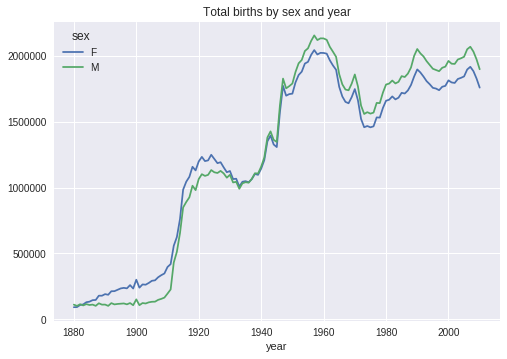

In [17]:
total_births.plot(title='Total births by sex and year')

In [16]:
def add_prop(group):
  births = group.births.astype(float)
  group['prop'] = births / births.sum()
  return group

names = names.groupby(['year', 'sex']).apply(add_prop)

names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [21]:
#It is good to check if all the props column sum to 1 (since its float, might not be exactly but suficciently close)
import numpy as np
np.allclose(names.groupby(['year','sex']).prop.sum(), 1)

True

In [26]:
#Now to get the top 1000 for each sex/year combination

def get_top1000(group):
  return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)


len(top1000)

261877

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/pivot.py:81: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


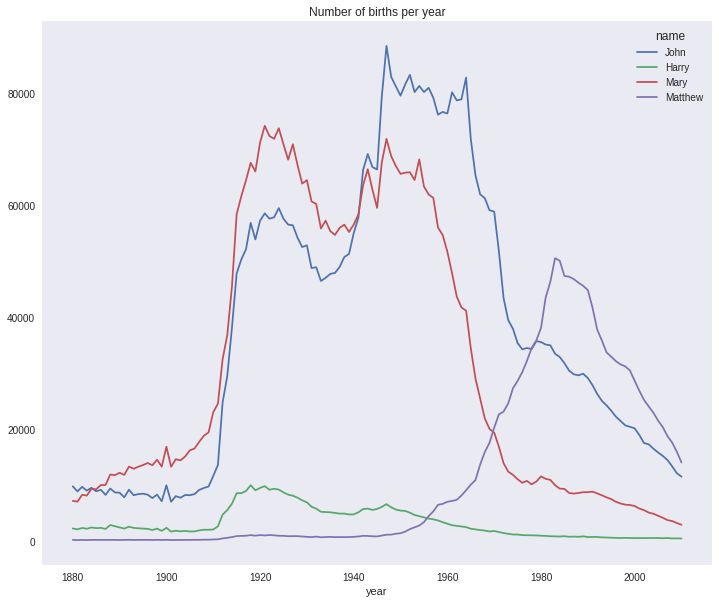

In [33]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
subset = total_births[['John', 'Harry', 'Mary', 'Matthew']]

subset.plot(subplots=False, figsize=(12,10), grid=False, title='Number of births per year')

In [0]:
boys = top1000[top1000['sex'] == 'M']
girls = top1000[top1000['sex'] == 'F']

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/pivot.py:81: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/pivot.py:81: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


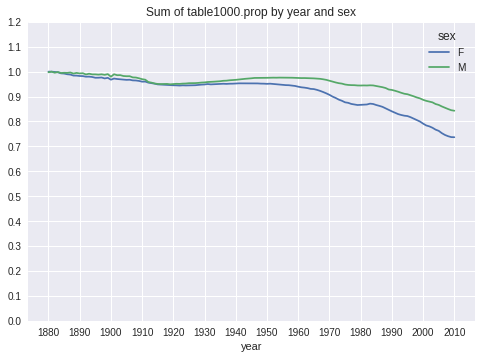

In [35]:
#Names are becoming more diverse. The proof:
table = top1000.pivot_table('prop', index='year',columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))


In [38]:
df = boys[boys.year == 2010]
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

prop_cumsum.searchsorted(0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


array([116])